In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Neural networks 

As we have learned in the previous notebook  a key ingredient of the supervised learning is finding a mapping that minimizes loss over a given data set. As we cannot generally find a minimum in a set of all functions (and actually we do not want to) we are looking for the minimum in a familly of functions defined by some set of parameters. 

The loss function the becomes the function of those parameters only. 

The neural networks make up such a familly of functions. Those functions are made up by composing together many elementary simple functions. Those  elementary functions are usually called neurons. 

# Neuron

A single neuron can have many inputs and only one output.  

<p style="text-align:center;"><img src='perceptron.svg' /></p>

There is a number $w_i$, called *weight*, associated with each input. Each input value $x_i$ is multiplied by the weight and the results are added together and Then another  $b$ called 
*bias* is added to the sum:

$$o = \sum_k w_k x_k +b$$

 and the result is used as an argument of an *activation function*.  

$$y = a(o) = a\left(\sum_k w_k x_k + b\right)$$

Together weights, bias and activation function define the behaviour of the neuron. The activation function is chosen once and remains constant. The weights and bias are the parameters that  have to be optimized during learning. 

# Activation functions

The simplest activation function would be the identity, which can be also considered as no activation function

### Identity 

$$a(x)=x$$

However this means that all that the neuron, or a collection of neurons can calculate are just affine functions. This is a much to small family for any practical use. 

To be able to represent more complicated functions we need to add some *non-linearity*

### Step function

$$
\Theta(x) = \begin{cases}
0 & x\leq0 \\
1 & x>0
\end{cases}
$$

### Sigmoid

$$s(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x}$$

In [2]:
def s(x):
    return 1.0/(1.0+np.exp(-x))

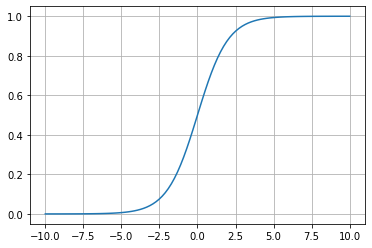

In [3]:
xs = np.linspace(-10,10,100)
plt.plot(xs,s(xs),'-')
plt.grid()

### Softmax

$$y_i = \frac{e^{o_i}}{\sum_i e^{o_i}}$$ 

$$\sum_i y_i = 1$$

### Tanh

$$ \tanh(x) =\frac{e^{x}-e^{-x}}{e^x+e^{-x}}$$

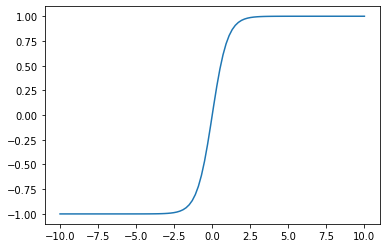

In [4]:
plt.plot(xs,np.tanh(xs),'-')

$$\tanh(x) = 2 s(2 x) -1 $$

### Rectified Linear Unit ( ReLU)

$$
\newcommand{\relu}{\operatorname{relu}}
\relu(x) = \begin{cases}
0 & x<=0 \\
x & x>0
\end{cases}
$$

In [5]:
import torch
relu = torch.nn.ReLU()

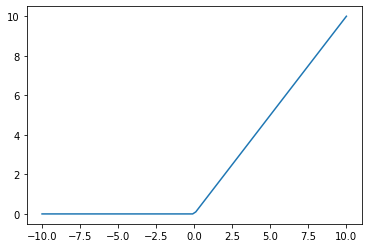

In [6]:
plt.plot(xs,relu(torch.from_numpy(xs)).numpy(),'-')
plt.show()

### Hiden layer

<p style='text-align:center;'><img src='hidden_layer.svg'/></p>

$$h_i = a^{(1)}\left(\sum_{j}w^{(1)}_{ij}x_j + b^{(1)}_i\right)$$

$$h = a^{(1)}\left(w^{(1)}x + b^{(1)}\right)$$

$$y =  a^{(2)}\left(\sum_{j}w^{(2)}_{ij}h_j + b^{(2)}_i\right)$$

$$y =  a^{(2)}\left(w^{(2)}h + b^{(2)}\right)$$

$$ 
y = a^{(2)}\left(
w^{(2)}a^{(1)}\left(w^{(1)}x + b^{(1)}
\right)+b^{(2)}
\right)$$

# Multilayer perceptron

<p style='text-align:center;'><img src='MLP.svg'/></p>

In [7]:
import torch.nn as nn

In [8]:
net = nn.Sequential(nn.Linear(in_features=1, out_features=128), nn.ReLU(),
                   nn.Linear(in_features=128, out_features=64), nn.ReLU(), 
                   nn.Linear(in_features=64, out_features=32), nn.ReLU(), 
                   nn.Linear(in_features=32, out_features=1))

How many parameters does this network have?

In [9]:
data = np.load("sgd_data.npy").astype('float32')
rxs = data[:50,0]
rys = data[:50,1]
rxs_valid = data[50:75,0]
rys_valid = data[50:75,1]

In [10]:
t_rxs = torch.from_numpy(rxs).view(-1,1)
t_rys = torch.from_numpy(rys).view(-1,1)
t_rxs_valid = torch.from_numpy(rxs_valid).view(-1,1)
t_rys_valid = torch.from_numpy(rys_valid).view(-1,1)

In [11]:
loss_f = nn.MSELoss()

In [12]:
optim = torch.optim.SGD(net.parameters(),lr=0.001)

In [13]:
%%time 
for epoch in range(25000):
    optim.zero_grad()
    pred = net(t_rxs)
    loss = loss_f(pred, t_rys)
    loss.backward()
    with torch.no_grad():
        pred_valid = net(t_rxs_valid)
        loss_valid = loss_f(pred_valid, t_rys_valid)
    optim.step()
print(loss, loss_valid)

tensor(0.0196, grad_fn=<MseLossBackward>) tensor(0.0196)
CPU times: user 1min 59s, sys: 1min 28s, total: 3min 27s
Wall time: 30.8 s


In [14]:
xs = np.linspace(-np.pi, np.pi, 200).astype('float32')
t_ys = net(torch.from_numpy(xs).view(-1,1))

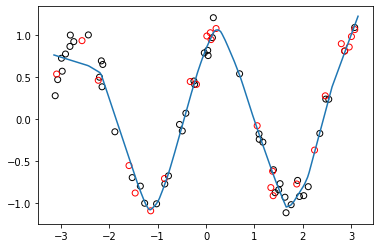

In [15]:
plt.scatter(rxs, rys, color='none', edgecolors='black')
plt.scatter(rxs_valid, rys_valid, color='none', edgecolors='red')
plt.plot(xs,t_ys.detach().numpy());